In [6]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # adjust the configuration of the plot

In [7]:
# read in the data
df = pd.read_csv(r'C:\Users\AMIR-H\Desktop\Portfolio Projects\Movie Industry Python\movies.csv')

In [8]:
# data control
df.head()

,budget,company,country,gross,votes,name,rating,genre,year,released,score,director,writer,star,runtime
0,19000000.0,Warner Bros.,United Kingdom,46998772.0,927000.0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,Stanley Kubrick,Stephen King,Jack Nicholson,146.0
1,4500000.0,Columbia Pictures,United States,58853106.0,65000.0,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,104.0
2,18000000.0,Lucasfilm,United States,538375067.0,1200000.0,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,Irvin Kershner,Leigh Brackett,Mark Hamill,124.0
3,3500000.0,Paramount Pictures,United States,83453539.0,221000.0,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,Jim Abrahams,Jim Abrahams,Robert Hays,88.0
4,6000000.0,Orion Pictures,United States,39846344.0,108000.0,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,Harold Ramis,Brian Doyle-Murray,Chevy Chase,98.0


In [9]:
# Data cleaning
# Missing data control
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print ('{} - {}%'.format(col, pct_missing))

budget - 0.2831246739697444%
company - 0.002217005738132499%
country - 0.0003912363067292645%
gross - 0.02464788732394366%
votes - 0.0003912363067292645%
name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
runtime - 0.0005216484089723526%


In [10]:
# For the sake of simplicity in this example the movies with missing data are eliminated.
df = df.dropna()

In [13]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print ('{} - {}%'.format(col, pct_missing))

budget - 0.0%
company - 0.0%
country - 0.0%
gross - 0.0%
votes - 0.0%
name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
runtime - 0.0%


In [14]:
#Controlying Datatypes for columns
df.dtypes

budget      float64
company      object
country      object
gross       float64
votes       float64
name         object
rating       object
genre        object
year          int64
released     object
score       float64
director     object
writer       object
star         object
runtime     float64
dtype: object

In [15]:
# changing data type_ budget to int64 , gross to int64

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [17]:
#Matching the year column with released column
#creating correct year column
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df

,budget,company,country,gross,votes,name,rating,genre,year,released,score,director,writer,star,runtime,yearcorrect
0,19000000,Warner Bros.,United Kingdom,46998772,927000.0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,Stanley Kubrick,Stephen King,Jack Nicholson,146.0,1980
1,4500000,Columbia Pictures,United States,58853106,65000.0,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,104.0,1980
2,18000000,Lucasfilm,United States,538375067,1200000.0,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,Irvin Kershner,Leigh Brackett,Mark Hamill,124.0,1980
3,3500000,Paramount Pictures,United States,83453539,221000.0,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,Jim Abrahams,Jim Abrahams,Robert Hays,88.0,1980
4,6000000,Orion Pictures,United States,39846344,108000.0,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,Harold Ramis,Brian Doyle-Murray,Chevy Chase,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,90000000,Columbia Pictures,United States,426505244,140000.0,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,Adil El Arbi,Peter Craig,Will Smith,124.0,2020
7649,85000000,Paramount Pictures,United States,319715683,102000.0,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,Jeff Fowler,Pat Casey,Ben Schwartz,99.0,2020
7650,175000000,Universal Pictures,United States,245487753,53000.0,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,101.0,2020
7651,135000000,20th Century Studios,Canada,111105497,42000.0,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,Chris Sanders,Michael Green,Harrison Ford,100.0,2020


In [18]:
#Sorting movies by gross income
df.sort_values(by=['gross'], inplace=False, ascending=False)

,budget,company,country,gross,votes,name,rating,genre,year,released,score,director,writer,star,runtime,yearcorrect
5445,237000000,Twentieth Century Fox,United States,2847246203,1100000.0,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,James Cameron,James Cameron,Sam Worthington,162.0,2009
7445,356000000,Marvel Studios,United States,2797501328,903000.0,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,Anthony Russo,Christopher Markus,Robert Downey Jr.,181.0,2019
3045,200000000,Twentieth Century Fox,United States,2201647264,1100000.0,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,James Cameron,James Cameron,Leonardo DiCaprio,194.0,1997
6663,245000000,Lucasfilm,United States,2069521700,876000.0,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,138.0,2015
7244,321000000,Marvel Studios,United States,2048359754,897000.0,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,Anthony Russo,Christopher Markus,Robert Downey Jr.,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3000000,Two Prong Lesson,United States,5073,3500.0,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,96.0,2015
2434,5000000,Trimark Pictures,United States,2970,1900.0,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,97.0,1994
3681,5000000,Copperheart Entertainment,Canada,2554,43000.0,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,John Fawcett,Karen Walton,Emily Perkins,108.0,2001
272,800000,Embassy Pictures,United States,2270,2300.0,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,Charles Band,Alan J. Adler,Robert Glaudini,85.0,1982


In [19]:
#Displaying the whole data
#pd.set_option('display.max_rows', None)

In [20]:
#Sorting movies by gross income
df.sort_values(by=['gross'], inplace=False, ascending=False)

,budget,company,country,gross,votes,name,rating,genre,year,released,score,director,writer,star,runtime,yearcorrect
5445,237000000,Twentieth Century Fox,United States,2847246203,1100000.0,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,James Cameron,James Cameron,Sam Worthington,162.0,2009
7445,356000000,Marvel Studios,United States,2797501328,903000.0,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,Anthony Russo,Christopher Markus,Robert Downey Jr.,181.0,2019
3045,200000000,Twentieth Century Fox,United States,2201647264,1100000.0,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,James Cameron,James Cameron,Leonardo DiCaprio,194.0,1997
6663,245000000,Lucasfilm,United States,2069521700,876000.0,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,138.0,2015
7244,321000000,Marvel Studios,United States,2048359754,897000.0,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,Anthony Russo,Christopher Markus,Robert Downey Jr.,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3000000,Two Prong Lesson,United States,5073,3500.0,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,96.0,2015
2434,5000000,Trimark Pictures,United States,2970,1900.0,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,97.0,1994
3681,5000000,Copperheart Entertainment,Canada,2554,43000.0,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,John Fawcett,Karen Walton,Emily Perkins,108.0,2001
272,800000,Embassy Pictures,United States,2270,2300.0,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,Charles Band,Alan J. Adler,Robert Glaudini,85.0,1982


In [21]:
# controlling duplicates
df.drop_duplicates()

,budget,company,country,gross,votes,name,rating,genre,year,released,score,director,writer,star,runtime,yearcorrect
0,19000000,Warner Bros.,United Kingdom,46998772,927000.0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,Stanley Kubrick,Stephen King,Jack Nicholson,146.0,1980
1,4500000,Columbia Pictures,United States,58853106,65000.0,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,104.0,1980
2,18000000,Lucasfilm,United States,538375067,1200000.0,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,Irvin Kershner,Leigh Brackett,Mark Hamill,124.0,1980
3,3500000,Paramount Pictures,United States,83453539,221000.0,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,Jim Abrahams,Jim Abrahams,Robert Hays,88.0,1980
4,6000000,Orion Pictures,United States,39846344,108000.0,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,Harold Ramis,Brian Doyle-Murray,Chevy Chase,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,90000000,Columbia Pictures,United States,426505244,140000.0,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,Adil El Arbi,Peter Craig,Will Smith,124.0,2020
7649,85000000,Paramount Pictures,United States,319715683,102000.0,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,Jeff Fowler,Pat Casey,Ben Schwartz,99.0,2020
7650,175000000,Universal Pictures,United States,245487753,53000.0,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,101.0,2020
7651,135000000,20th Century Studios,Canada,111105497,42000.0,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,Chris Sanders,Michael Green,Harrison Ford,100.0,2020


In [22]:
# Finding the corrolation between gross income and different variables.
# corrolation between budget and gross income


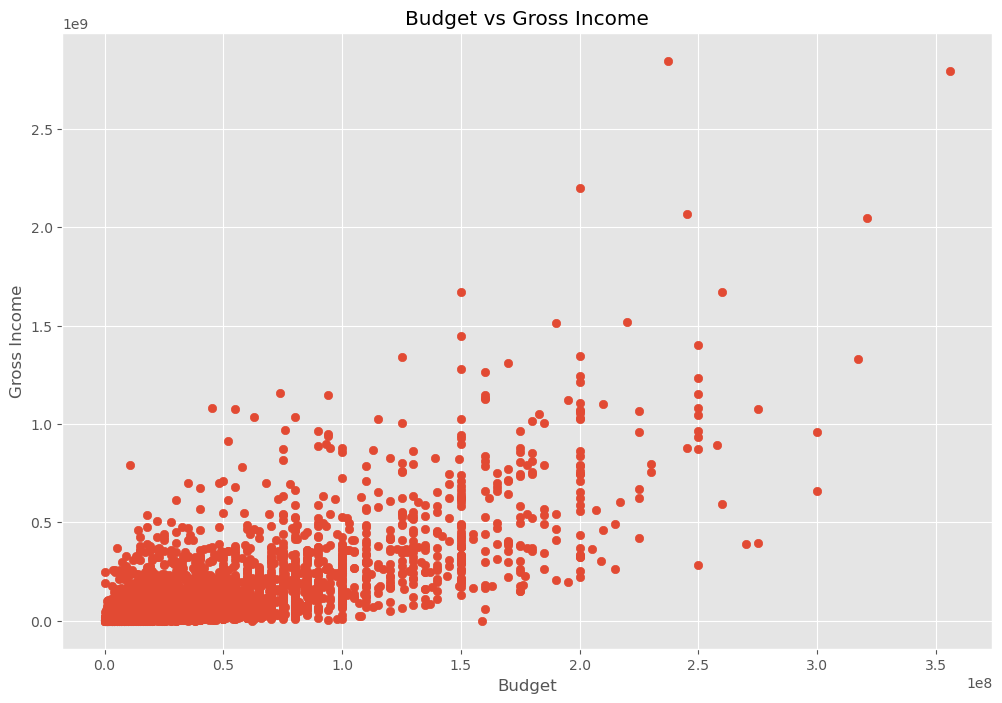

In [23]:
# scatter plot with budget vs gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Income')
plt.xlabel('Budget')
plt.ylabel('Gross Income')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

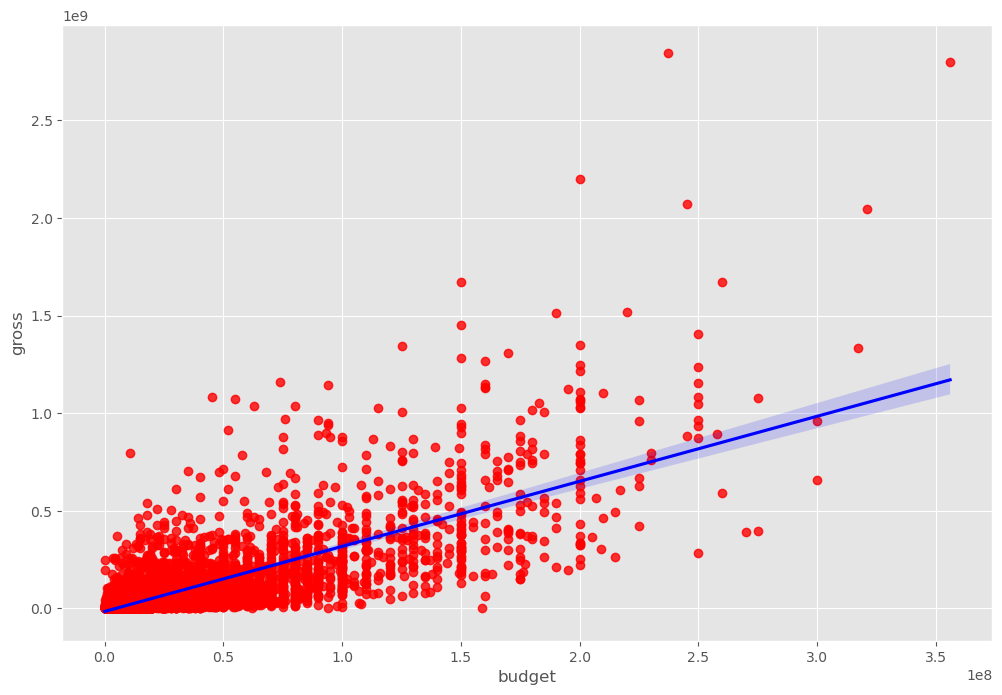

In [24]:
# Using seaborn to plot budget vs gross
sns.regplot(x= 'budget', y= 'gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})


In [25]:
# correlation Test
#pearson
df.corr(method = 'pearson') 

,budget,gross,votes,year,score,runtime,yearcorrect
budget,1.000000,0.740247,0.439675,0.327722,0.072001,0.318695,0.320312
gross,0.740247,1.000000,0.614751,0.274321,0.222556,0.275796,0.268721
votes,0.439675,0.614751,1.000000,0.206021,0.474256,0.352303,0.203098
year,0.327722,0.274321,0.206021,1.000000,0.056386,0.075077,0.998726
score,0.072001,0.222556,0.474256,0.056386,1.000000,0.414068,0.061923
runtime,0.318695,0.275796,0.352303,0.075077,0.414068,1.000000,0.075294
yearcorrect,0.320312,0.268721,0.203098,0.998726,0.061923,0.075294,1.000000


In [26]:
#Kendall
df.corr(method = 'kendall')  

,budget,gross,votes,year,score,runtime,yearcorrect
budget,1.000000,0.512057,0.346274,0.220833,-0.006406,0.231278,0.213719
gross,0.512057,1.000000,0.553625,0.239539,0.124943,0.176979,0.232372
votes,0.346274,0.553625,1.000000,0.296512,0.350185,0.205344,0.293044
year,0.220833,0.239539,0.296512,1.000000,0.039389,0.064824,0.991304
score,-0.006406,0.124943,0.350185,0.039389,1.000000,0.292254,0.043400
runtime,0.231278,0.176979,0.205344,0.064824,0.292254,1.000000,0.064793
yearcorrect,0.213719,0.232372,0.293044,0.991304,0.043400,0.064793,1.000000


In [27]:
#spearman
df.corr(method='spearman')

,budget,gross,votes,year,score,runtime,yearcorrect
budget,1.000000,0.692958,0.493461,0.312886,-0.009971,0.330794,0.302535
gross,0.692958,1.000000,0.745793,0.351045,0.183192,0.257400,0.340529
votes,0.493461,0.745793,1.000000,0.427623,0.495409,0.300621,0.422988
year,0.312886,0.351045,0.427623,1.000000,0.057741,0.095444,0.998694
score,-0.009971,0.183192,0.495409,0.057741,1.000000,0.412155,0.063674
runtime,0.330794,0.257400,0.300621,0.095444,0.412155,1.000000,0.095507
yearcorrect,0.302535,0.340529,0.422988,0.998694,0.063674,0.095507,1.000000


In [28]:
# using pearson method for correlation matrix in this example
# Result 1==> High correlation between budget and gross 
#correlation Rate= 0.71

In [29]:
# correlation Test
#pearson
df.corr(method = 'pearson') 

,budget,gross,votes,year,score,runtime,yearcorrect
budget,1.000000,0.740247,0.439675,0.327722,0.072001,0.318695,0.320312
gross,0.740247,1.000000,0.614751,0.274321,0.222556,0.275796,0.268721
votes,0.439675,0.614751,1.000000,0.206021,0.474256,0.352303,0.203098
year,0.327722,0.274321,0.206021,1.000000,0.056386,0.075077,0.998726
score,0.072001,0.222556,0.474256,0.056386,1.000000,0.414068,0.061923
runtime,0.318695,0.275796,0.352303,0.075077,0.414068,1.000000,0.075294
yearcorrect,0.320312,0.268721,0.203098,0.998726,0.061923,0.075294,1.000000


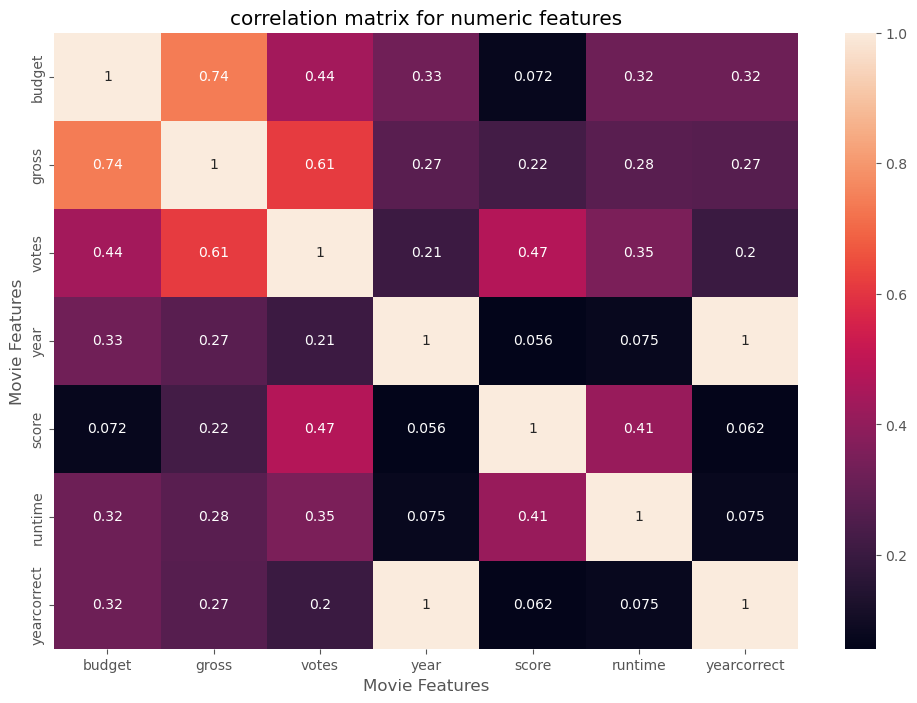

In [30]:
# Using heatmap tp show correlations
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('correlation matrix for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [31]:
# Result 2 ==> High correlation between Votes and gross 
#correlation Rate= 0.63

In [32]:
df

,budget,company,country,gross,votes,name,rating,genre,year,released,score,director,writer,star,runtime,yearcorrect
0,19000000,Warner Bros.,United Kingdom,46998772,927000.0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,Stanley Kubrick,Stephen King,Jack Nicholson,146.0,1980
1,4500000,Columbia Pictures,United States,58853106,65000.0,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,104.0,1980
2,18000000,Lucasfilm,United States,538375067,1200000.0,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,Irvin Kershner,Leigh Brackett,Mark Hamill,124.0,1980
3,3500000,Paramount Pictures,United States,83453539,221000.0,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,Jim Abrahams,Jim Abrahams,Robert Hays,88.0,1980
4,6000000,Orion Pictures,United States,39846344,108000.0,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,Harold Ramis,Brian Doyle-Murray,Chevy Chase,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,90000000,Columbia Pictures,United States,426505244,140000.0,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,Adil El Arbi,Peter Craig,Will Smith,124.0,2020
7649,85000000,Paramount Pictures,United States,319715683,102000.0,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,Jeff Fowler,Pat Casey,Ben Schwartz,99.0,2020
7650,175000000,Universal Pictures,United States,245487753,53000.0,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,101.0,2020
7651,135000000,20th Century Studios,Canada,111105497,42000.0,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,Chris Sanders,Michael Green,Harrison Ford,100.0,2020


In [35]:
# Converting string variables to numeric codes.

df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
            df_numerized[col_name] = df_numerized[col_name].astype('category')
            df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,budget,company,country,gross,votes,name,rating,genre,year,released,score,director,writer,star,runtime,yearcorrect
0,19000000,1426,46,46998772,927000.0,4692,6,6,1980,1304,8.4,1795,2832,699,146.0,1980
1,4500000,452,47,58853106,65000.0,3929,6,1,1980,1127,5.8,1578,1158,214,104.0,1980
2,18000000,945,47,538375067,1200000.0,3641,4,0,1980,1359,8.7,757,1818,1157,124.0,1980
3,3500000,1108,47,83453539,221000.0,204,4,4,1980,1127,7.7,889,1413,1474,88.0,1980
4,6000000,1083,47,39846344,108000.0,732,6,4,1980,1170,7.3,719,351,271,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,90000000,452,47,426505244,140000.0,415,6,0,2020,904,6.6,16,2390,1812,124.0,2020
7649,85000000,1108,47,319715683,102000.0,3556,4,0,2020,713,6.5,852,2309,147,99.0,2020
7650,175000000,1397,47,245487753,53000.0,1153,4,1,2020,904,5.6,1809,2827,1470,101.0,2020
7651,135000000,12,6,111105497,42000.0,3978,4,1,2020,758,6.8,294,2091,640,100.0,2020


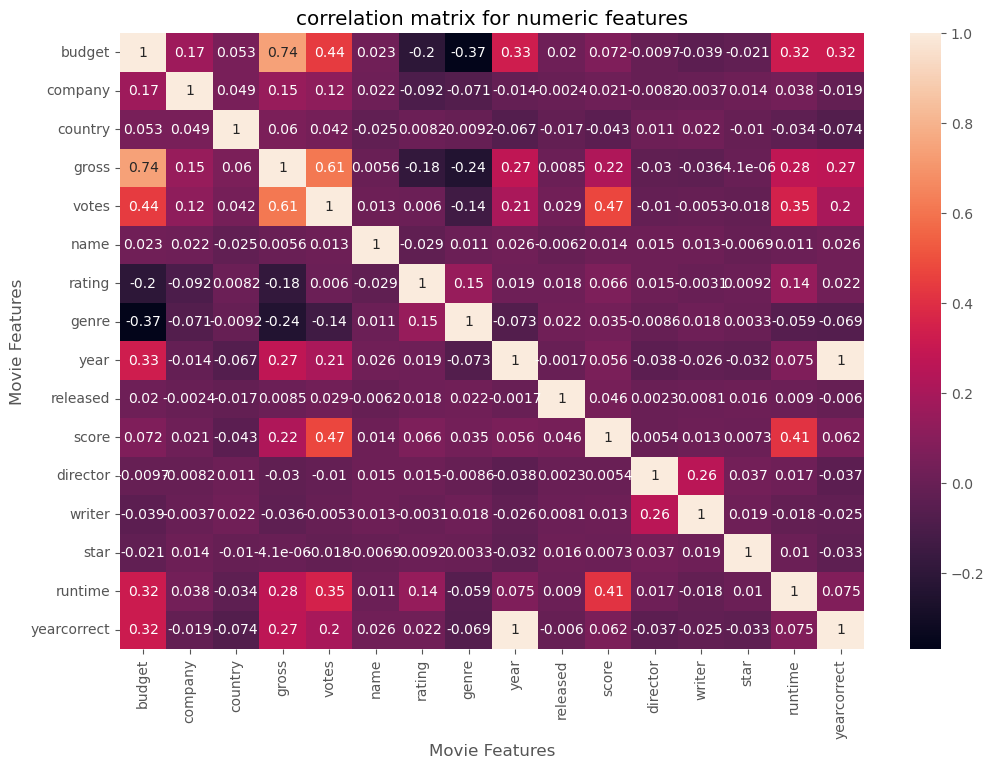

In [36]:
# Using heatmap tp show correlations with string variables
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('correlation matrix for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [37]:
df_numerized.corr()

,budget,company,country,gross,votes,name,rating,genre,year,released,score,director,writer,star,runtime,yearcorrect
budget,1.000000,0.170235,0.052977,0.740247,0.439675,0.023392,-0.203946,-0.368523,0.327722,0.019952,0.072001,-0.009662,-0.039466,-0.021473,0.318695,0.320312
company,0.170235,1.000000,0.048569,0.149553,0.118470,0.021697,-0.092357,-0.071334,-0.014333,-0.002407,0.020656,-0.008223,-0.003697,0.014082,0.037585,-0.018806
country,0.052977,0.048569,1.000000,0.060078,0.041551,-0.025490,0.008230,-0.009164,-0.066748,-0.017228,-0.043051,0.011133,0.022488,-0.009990,-0.034477,-0.073569
gross,0.740247,0.149553,0.060078,1.000000,0.614751,0.005639,-0.181906,-0.244101,0.274321,0.008501,0.222556,-0.029560,-0.035885,-0.000004,0.275796,0.268721
votes,0.439675,0.118470,0.041551,0.614751,1.000000,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,-0.010376,-0.005316,-0.017638,0.352303,0.203098
name,0.023392,0.021697,-0.025490,0.005639,0.012615,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.015246,0.012880,-0.006882,0.010850,0.025542
rating,-0.203946,-0.092357,0.008230,-0.181906,0.006031,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.014656,-0.003149,0.009196,0.140792,0.022021
genre,-0.368523,-0.071334,-0.009164,-0.244101,-0.135990,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.008553,0.017578,0.003341,-0.059237,-0.069147
year,0.327722,-0.014333,-0.066748,0.274321,0.206021,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,-0.038354,-0.025908,-0.032157,0.075077,0.998726
released,0.019952,-0.002407,-0.017228,0.008501,0.028833,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.002308,0.008072,0.015706,0.008975,-0.005989


In [39]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

budget       budget         1.000000
             company        0.170235
             country        0.052977
             gross          0.740247
             votes          0.439675
                              ...   
yearcorrect  director      -0.037371
             writer        -0.025495
             star          -0.032687
             runtime        0.075294
             yearcorrect    1.000000
Length: 256, dtype: float64

In [40]:
sorted_corr_pairs = corr_pairs.sort_values()
sorted_corr_pairs

genre        budget        -0.368523
budget       genre         -0.368523
gross        genre         -0.244101
genre        gross         -0.244101
budget       rating        -0.203946
                              ...   
gross        gross          1.000000
country      country        1.000000
company      company        1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64

In [42]:
high_corr = sorted_corr_pairs[(sorted_corr_pairs)>0.5]
high_corr

votes        gross          0.614751
gross        votes          0.614751
budget       gross          0.740247
gross        budget         0.740247
yearcorrect  year           0.998726
year         yearcorrect    0.998726
budget       budget         1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
name         name           1.000000
votes        votes          1.000000
gross        gross          1.000000
country      country        1.000000
company      company        1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# End resault==> Votes and budget have the highest correlation to gross earning